<AxesSubplot:>

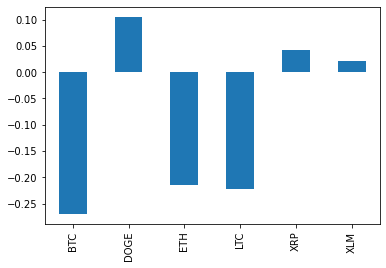

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

harold_portfolio_path = Path('harold_portfolio.csv')
my_portfolio_path = Path('my_portfolio.csv')

harold_csv = pd.read_csv(harold_portfolio_path, header=0, parse_dates=True, index_col='Date', infer_datetime_format=True)
my_portfolio_csv = pd.read_csv(my_portfolio_path, header=0, parse_dates=True, index_col='Date', infer_datetime_format=True)

harold_daily_returns = harold_csv.pct_change().dropna()
my_daily_returns = my_portfolio_csv.pct_change().dropna()
merged_daily_returns = pd.concat([harold_daily_returns, my_daily_returns], ignore_index=False,
                                 axis='rows', join='inner').drop_duplicates()
st_dev_numpy = np.std(merged_daily_returns)
st_dev2_pandas = merged_daily_returns.std()
sharpe_ratios = ((merged_daily_returns.mean()) * 252) / (merged_daily_returns.std() * np.sqrt(252))
sharpe_ratios.plot.bar()